<a href="https://colab.research.google.com/github/Rehannurle/cat-vs-dog-specifier/blob/main/newcatsanddogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:04<00:00, 255MB/s]
100% 1.06G/1.06G [00:04<00:00, 254MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras.layers import Flatten,BatchNormalization,Dropout

In [8]:
#generater for create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
#creating a CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))







In [18]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.1831 - accuracy: 0.6043 - val_loss: 0.5981 - val_accuracy: 0.6850
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5585 - accuracy: 0.7171 - val_loss: 0.5346 - val_accuracy: 0.7366
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4897 - accuracy: 0.7686 - val_loss: 0.4612 - val_accuracy: 0.7842
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4058 - accuracy: 0.8166 - val_loss: 0.4633 - val_accuracy: 0.7820
Epoch 5/10
625/625 [==============================] - 71s 113ms/step - loss: 0.3377 - accuracy: 0.8539 - val_loss: 0.5099 - val_accuracy: 0.7926
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2686 - accuracy: 0.8865 - val_loss: 0.5124 - val_accuracy: 0.8092
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.1832 - accuracy: 0.9257 - val_loss: 0.6053 - val_ac

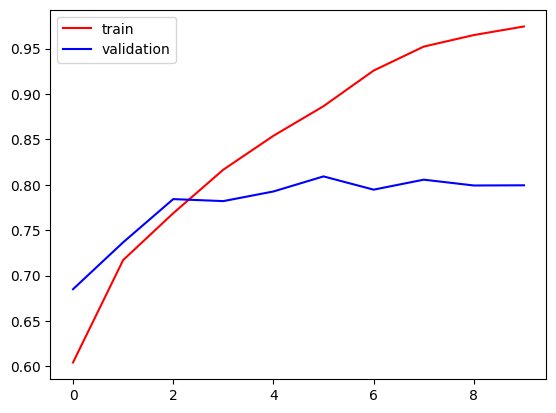

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

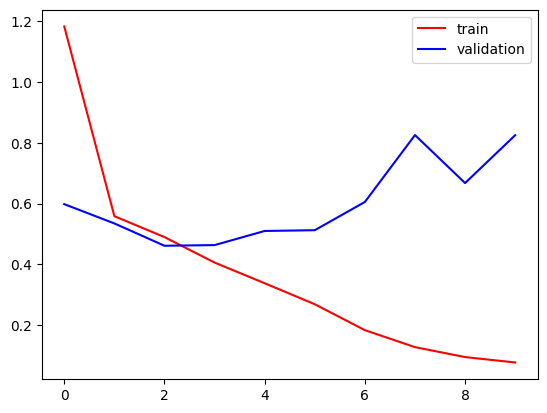

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import cv2


In [30]:
test_image = cv2.imread('/content/dog.jpeg')

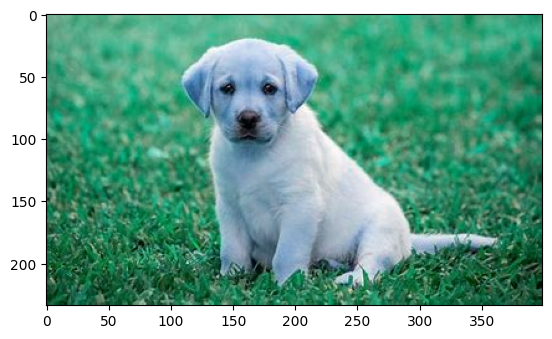

In [31]:
plt.imshow(test_image)

In [32]:
test_image.shape

(234, 399, 3)

In [33]:
test_image = cv2.resize(test_image,(256,256))

In [34]:
test_input = test_image.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)